In [631]:
import pandas as pd
df = pd.read_csv('./data.csv')
df
df.drop(['sr_no'], axis=1)

,age,income,student,credit_rating,class_label
0,Y,H,N,fair,NO
1,Y,H,N,excellent,NO
2,M,H,N,fair,YES
3,S,M,N,fair,YES
4,S,L,Y,fair,YES
5,S,L,Y,excellent,NO
6,M,L,Y,excellent,YES
7,Y,M,N,fair,NO
8,Y,L,Y,fair,YES
9,S,M,Y,fair,YES


Information gain = entropy (data) - entropy (after utilizing one feature)


In [632]:
E_age = df[['age','class_label']]
E_age.value_counts()

age  class_label
M    YES            4
S    YES            3
Y    NO             3
S    NO             2
Y    YES            2
Name: count, dtype: int64

## age feature entropy


In [633]:
import numpy as np

counts_age = df.groupby(['age', 'class_label']).size().unstack(fill_value=0)

counts_age


class_label,NO,YES
age,,
M,0,4
S,2,3
Y,3,2


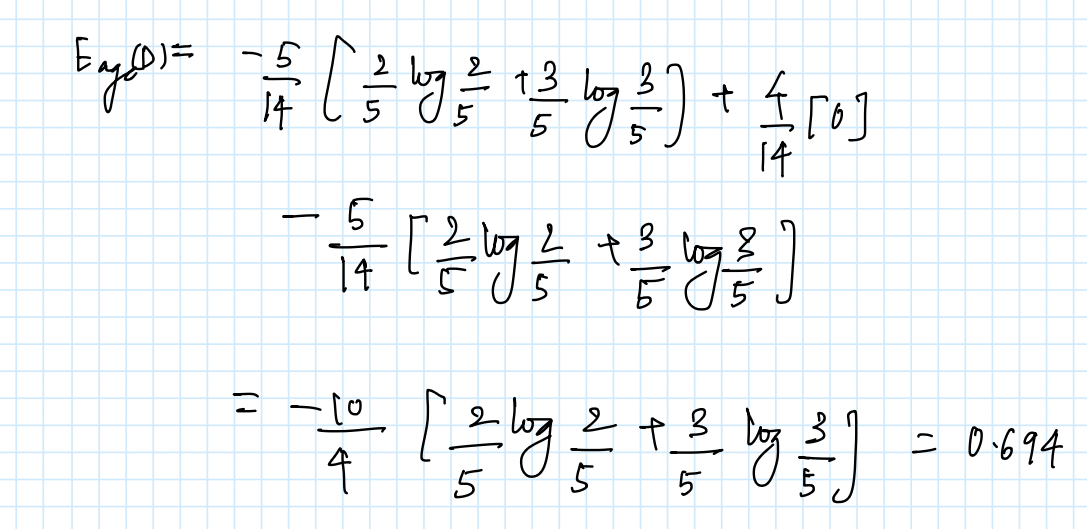


In [634]:
original_ent = 0.940

In [635]:
n = 14

total_ent = 0

for age in counts_age.index:
    count_yes = counts_age.loc[age,'YES']
    count_no = counts_age.loc[age,'NO']

    tot_count = count_yes+count_no
    print(tot_count, count_yes, count_no)

    total_ent = ((tot_count/n) * ( ((count_yes/tot_count)*(np.log2(count_yes/tot_count))) + ( (count_no/tot_count)*(np.log2(count_no/tot_count))) )) * -1
    print(total_ent)
    total_ent += total_ent

print(total_ent)
total_age = total_ent

4 4 0
nan
5 3 2
0.3467680694480959
5 2 3
0.3467680694480959
0.6935361388961918


/var/folders/9f/7hhtd_4d75sc0w7x26jq14hh0000gn/T/ipykernel_5457/602333586.py:12: RuntimeWarning: divide by zero encountered in log2
  total_ent = ((tot_count/n) * ( ((count_yes/tot_count)*(np.log2(count_yes/tot_count))) + ( (count_no/tot_count)*(np.log2(count_no/tot_count))) )) * -1
/var/folders/9f/7hhtd_4d75sc0w7x26jq14hh0000gn/T/ipykernel_5457/602333586.py:12: RuntimeWarning: invalid value encountered in scalar multiply
  total_ent = ((tot_count/n) * ( ((count_yes/tot_count)*(np.log2(count_yes/tot_count))) + ( (count_no/tot_count)*(np.log2(count_no/tot_count))) )) * -1


## income entropy


In [636]:
counts_income = df.groupby(['income', 'class_label']).size().unstack(fill_value=0)
counts_income

class_label,NO,YES
income,,
H,2,2
L,1,3
M,2,4


In [640]:
n = 14

total_ent = 0
total_income = 0

for income in counts_income.index:
    count_yes = counts_income.loc[income,'YES']
    count_no = counts_income.loc[income,'NO']

    tot_count = count_yes+count_no
    print(tot_count, count_yes, count_no)

    total_ent = ((tot_count/n) * ( ((count_yes/tot_count)*(np.log2(count_yes/tot_count))) + ( (count_no/tot_count)*(np.log2(count_no/tot_count))) )) * -1
    print(total_ent)
    total_income +=total_ent

print("----")
print(total_income)
print(original_ent-total_income)

4 2 2
0.2857142857142857
4 3 1
0.23179374984546652
6 4 2
0.39355535745192405
----
0.9110633930116763
0.028936606988323677


In [641]:
print(total_income)
print(original_ent-total_income)

0.9110633930116763
0.028936606988323677


## student entropy


In [642]:
counts_student = df.groupby(['student', 'class_label']).size().unstack(fill_value=0)
counts_student

class_label,NO,YES
student,,
N,4,3
Y,1,6


In [643]:
n = 14

total_ent = 0
total_students = 0

for age in counts_student.index:
    count_yes = counts_student.loc[age,'YES']
    count_no = counts_student.loc[age,'NO']

    tot_count = count_yes+count_no
    print(tot_count, count_yes, count_no)

    total_ent = ((tot_count/n) * ( ((count_yes/tot_count)*(np.log2(count_yes/tot_count))) + ( (count_no/tot_count)*(np.log2(count_no/tot_count))) )) * -1
    print(total_ent)
    total_students += total_ent


7 3 4
0.49261406801712576
7 6 1
0.29583638929116374


In [644]:
print(total_students)
print(original_ent-total_students)

0.7884504573082896
0.1515495426917104


## credit rating entropy


In [645]:
counts_credit = df.groupby(['credit_rating', 'class_label']).size().unstack(fill_value=0)
counts_credit

class_label,NO,YES
credit_rating,,
excellent,3,3
fair,2,6


In [646]:
n = 14

total_ent = 0
total_credit = 0

for age in counts_credit.index:
    count_yes = counts_credit.loc[age,'YES']
    count_no = counts_credit.loc[age,'NO']

    tot_count = count_yes+count_no
    print(tot_count, count_yes, count_no)

    total_ent = ((tot_count/n) * ( ((count_yes/tot_count)*(np.log2(count_yes/tot_count))) + ( (count_no/tot_count)*(np.log2(count_no/tot_count))) )) * -1
    print(total_ent)
    total_credit += total_ent
    

6 3 3
0.42857142857142855
8 6 2
0.46358749969093305


In [647]:
print(original_ent-total_age)
print(original_ent-total_income)
print(original_ent-total_students)
print(original_ent-total_credit)

0.24646386110380814
0.028936606988323677
0.1515495426917104
0.0478410717376383
